In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

# Computing Limits

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)

print(lim, lim_pnt**3)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

3.37500000000000 3.375


<IPython.core.display.Math object>

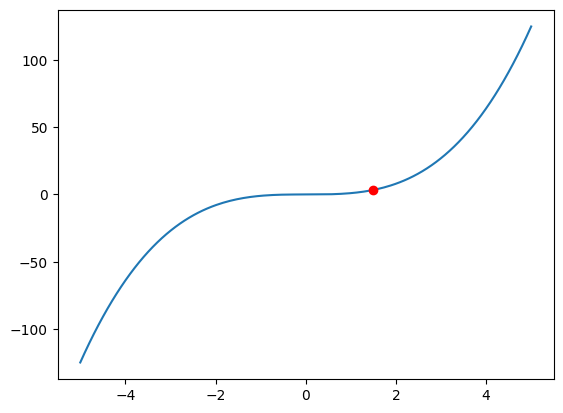

In [13]:
fxx = sym.lambdify(x, fx)
fxx(2)

xx = np.linspace(-5, 5, 200)

plt.plot(xx, fxx(xx))
plt.plot(lim_pnt, lim, 'ro')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

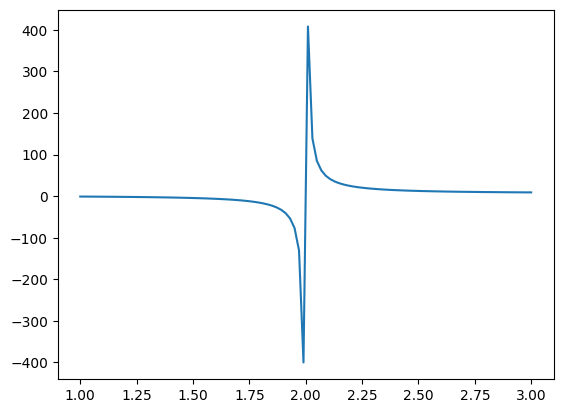

In [15]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 3, 102)

lim_pnt = 2
lim_neg = sym.limit(fx, x, lim_pnt, dir='-')
lim_pos = sym.limit(fx, x, lim_pnt, dir='+')

plt.plot(xx, fxx(xx))
display(Math('\\lim_{x\\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim_neg)))
display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt, sym.latex(fx), lim_pos)))

plt.show()

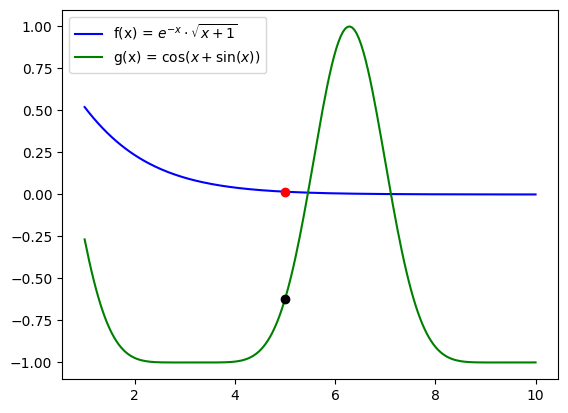

In [28]:
# f(x) = e^-x * sqrt(x + 1)
# g(x) = cos(x + sin(x))

x = sym.symbols('x')
fx = sym.exp(-x) * sym.sqrt(x + 1)
fxx = sym.lambdify(x, fx)
xx = np.linspace(1, 10, 200)

lim_pnt_fx = 5
lim_fx = sym.limit(fx, x, lim_pnt_fx)

plt.plot(xx, fxx(xx),'b',label='f(x) = $e^{-x} \\cdot \\sqrt{x + 1}$')
plt.plot(lim_pnt_fx, lim_fx, 'ro')

gx = sym.cos(x + sym.sin(x))
gxx = sym.lambdify(x, gx)
lim_pnt_gx = 5
lim_gx = sym.limit(gx, x, lim_pnt_gx)

plt.plot(xx, gxx(xx),'g',label='g(x) = $\\cos(x + \\sin(x))$')
plt.plot(lim_pnt_gx, lim_gx, 'ko')

plt.legend()
plt.show()